<a href="https://colab.research.google.com/github/KhandareAshutosh/WhatsApp_Analysis/blob/main/Whatsapp_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
with open('/content/drive/MyDrive/WhatsApp chat Analysis/WhatsApp Chat.txt') as f:
  content = f.readlines()

content = [x.strip() for x in content]

In [5]:
content[:5]

['22/07/2023, 8:40\u202fam - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '22/07/2023, 10:06\u202fam - +263 71 718 7879: 🙌🏾',
 '22/07/2023, 10:12\u202fam - +265 991 86 00 64: Done',
 '22/07/2023, 10:18\u202fam - +234 916 045 5006: Is this united related chief?',
 '22/07/2023, 10:18\u202fam - +234 807 555 0788: Rest abeg']

In [6]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [7]:
sid = SentimentIntensityAnalyzer()

In [8]:
sid.polarity_scores(':)')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}

In [9]:
sid.polarity_scores(':(')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}

In [10]:
sid.polarity_scores("This is a REALLY happy sentence!")

{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.807}

In [11]:
pol_lst = []
date_lst = []
i = 0

for line in content:
  try:
      text = nltk.sent_tokenize(line.split(':')[2].replace('\n', ' '))
      date = line.split(',')[0]

      for token in text:

        ss = sid.polarity_scores(token)
        pol_lst.append(ss['compound'])
        date_lst.append(date)
  except:
    #print(i, line)
    pass

  i+=1


In [12]:
df = pd.DataFrame({'date': date_lst, 'pol': pol_lst})

In [13]:
df[:5]

,date,pol
0,22/07/2023,0.0000
1,22/07/2023,0.0000
2,22/07/2023,0.4215
3,22/07/2023,0.0000
4,22/07/2023,0.0000


In [14]:
df2 = df.groupby('date').mean()


In [15]:
df2

,pol
date,
22/07/2023,0.042445
23/07/2023,0.063499
24/07/2023,0.042456
25/07/2023,0.069303
26/07/2023,0.065763
27/07/2023,0.016030
28/07/2023,0.064779
29/07/2023,0.039766
30/07/2023,0.038652


In [16]:
df2.index = pd.to_datetime(df2.index, errors='coerce')

# Filter out rows with invalid dates
df2 = df2[df2.index.notnull()]

# Sort the DataFrame by the index (dates)
df2 = df2.sort_index()

# Change the date format of the index
new_date_format = '%d/%m/%Y'
df2.index = df2.index.strftime(new_date_format)


<ipython-input-16-81cfbd4a024d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2.index = pd.to_datetime(df2.index, errors='coerce')


<Figure size 640x480 with 0 Axes>

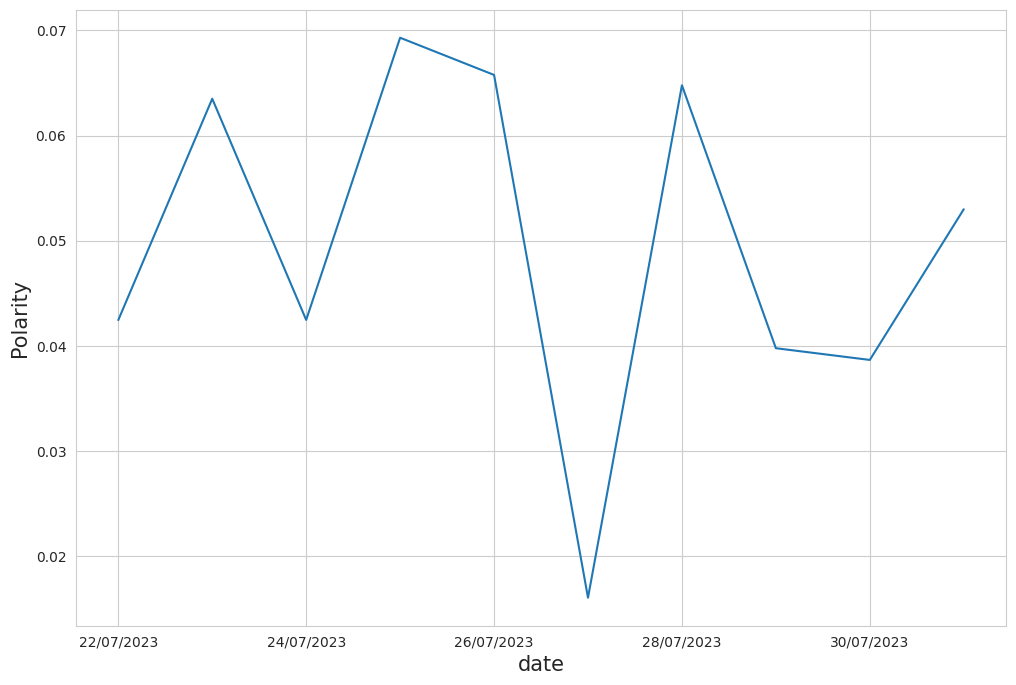

In [17]:
sns.set_style("whitegrid")

plt.figure()
ax = df2.plot(figsize=(12,8), legend=False)

ax.set_ylabel('Polarity')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

In [18]:
!pip install emoji --upgrade
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=60ad38eaaeb26cc441a07a3e123556c8f658f15be8e75712fc7de1fc5524158b
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [19]:
test = content[10:50]

In [20]:
for line in test:
  for c in line:
    if c in emoji.EMOJI_DATA:
      print(c)
      print(emoji.demojize(c).replace('_', ' ').replace(':', '.'))
      print(sid.polarity_scores(emoji.demojize(c).replace('_',' ').replace(':', '.'))['compound'])

👇
.backhand index pointing down.
0.0
🏾
.medium-dark skin tone.
0.0
🔥
.fire.
0.0
🔥
.fire.
0.0
😀
.grinning face.
0.3612
😂
.face with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
🤧
.sneezing face.
0.0
😭
.loudly crying face.
-0.4767
🙌
.raising hands.
0.0
🙌
.raising hands.
0.0
😀
.grinning face.
0.3612
🤣
.rolling on the floor laughing.
0.4939
🤣
.rolling on the floor laughing.
0.4939
🔥
.fire.
0.0
🔥
.fire.
0.0
😀
.grinning face.
0.3612
🤣
.rolling on the floor laughing.
0.4939
😹
.cat with tears of joy.
0.4404
😹
.cat with tears of joy.
0.4404
😹
.cat with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
🤣
.rolling on the floor laughing.
0.4939
🤣
.rolling on the floor laughing.
0.4939
😂
.face with tears of joy.
0.4404
😂
.face with tears of joy.
0.4404
💪
.flexed biceps.
0.0
🏻
.light skin tone.
0.0
🤣
.rolling on the floor laughing.
0.4939
👍
.thumbs up.
0.0
🏻
.light skin tone.
0.0
🔥
.f

In [21]:
final = defaultdict(list)
i=1 # used as final dictionary key

for line in content[1:]:
  try:
    date = line.split(',')[0] #strip just the date
    person = line.split(':')[1][7:]   # strip the persons name
    text = ':'.join(line.split(':')[3:]) # strip just the text
    # convert emojis to their Unicode description ...works well with sentiment
            # loop through each character to check if it's an emoji, then convert
    for c in text:
      if c in emoji.EMOJI_DATA:
        text = text.replace(c, emoji.demojize(c).replace('_',' ').replace(':','.'))

    # tokenize the sentence, i.e. split up into chunks based on punctuation.
    sentence = nltk.sent_tokenize(text)
    num = np.array([])

    for token in sentence:
      # calculate sentiment of token and add to the final dictionary along with person and date metrics
      ss = sid.polarity_scores(token)

      final[i] = [ss['compound'], person, date, token]
      i+=1

  except:
    pass

df = pd.DataFrame(final).T # convert dictionary to a dataframe, makes process of plotting straightforward

df.columns = ['pol', 'name', 'date', 'token']


In [22]:
df[['pol','token', 'name']].sort_values('pol')[:10] # see who has sent the most negative messages

,pol,token,name
221,-0.6066,I don't like none of them but I dislike Liverp...,+234 807 555 0788
264,-0.6066,I don't like none of them but I dislike Liverp...,+234 806 947 9756
302,-0.5106,It was just a bunch of angry emojis.,+234 807 555 0788
452,-0.4939,Man Utd confirm that Kobbie Mainoo suffered a...,+91 70340 12240
443,-0.4639,Without their blessing it would be hard to see...,+234 816 663 7016
107,-0.4215,Kobbie Mainoo has been found guilty of steali...,+234 818 040 8409
35,-0.4215,"Faced with the impatience of the fans, a well...",+91 99300 39204
148,-0.4215,Kobbie Mainoo has been found guilty of steali...,+44 7448 705593
527,-0.4019,Three key areas and when you don’t do this rig...,+234 703 680 1080
36,-0.4019,.enraged face.,+91 99300 39204


In [23]:
len(df)

607

In [24]:
df[:15]

,pol,name,date,token
1,0.0,+27 68 193 2132,22/07/2023,00
2,0.0,+91 70473 56399,22/07/2023,30am
3,0.0,+254 721 873087,22/07/2023,shiam89
4,0.0,+254 713 795047,22/07/2023,@ronniechirchir .fire.
5,0.0,+234 813 187 9836,22/07/2023,@Odetola_
6,0.0,+91 99300 39204,22/07/2023,https://twitter.com/The_Tirewolf?t=MqiIyWQVjQ...
7,0.0,+234 906 509 4539,22/07/2023,@kolavicofficial
8,0.0,+234 806 013 3321,22/07/2023,//twitter.com/HabilaSamuel9?t=eHy_KmJ0fXfmdRoL...
9,0.0,+256 708 440551,22/07/2023,//twitter.com/jeremy_terrance?s=09
10,0.0,+256 708 440551,22/07/2023,//twitter.com/jeremy_terrance?s=09


In [25]:
df.dtypes

pol      object
name     object
date     object
token    object
dtype: object

In [26]:
df['pol'] = df['pol'].apply(lambda x : float(x))  # convert polarity to a float

In [27]:
# Calculate the mean sentiment of all messages for each person, each day:
df2 = df.groupby(['date', 'name'], as_index = False).agg('mean')

<ipython-input-27-13cc16bb8c46>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(['date', 'name'], as_index = False).agg('mean')


In [28]:
df2[:15]

,date,name,pol
0,22/07/2023,+233 50 634 1482,0.000000
1,22/07/2023,+233 57 141 1111,0.000000
2,22/07/2023,+234 806 013 3321,0.000000
3,22/07/2023,+234 807 555 0788,0.384556
4,22/07/2023,+234 813 187 9836,0.000000
5,22/07/2023,+234 816 961 3309,0.000000
6,22/07/2023,+234 818 040 8409,0.000000
7,22/07/2023,+234 901 278 2843,0.000000
8,22/07/2023,+234 906 509 4539,0.000000
9,22/07/2023,+252 61 7409827,0.670500


In [29]:
# Create a 'combined' dataset, based on the mean polarity of people in the chat:
df3 = df.groupby(['date'], as_index = False).agg('mean')

<ipython-input-29-b3ff9862ce55>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.groupby(['date'], as_index = False).agg('mean')


In [30]:
df3['name'] = 'Combined'

In [31]:
# Join 'combined' onto 'original'

final = pd.concat([df2,df3])

In [32]:


# Convert the "Date" column to datetime format
final["date"] = pd.to_datetime(final["date"], errors="coerce")

# Drop rows with invalid or empty dates
final = final.dropna(subset=["date"])



<ipython-input-32-09ea932d2fb0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final["date"] = pd.to_datetime(final["date"], errors="coerce")


In [33]:
final[:15]

,date,name,pol
0,2023-07-22,+233 50 634 1482,0.000000
1,2023-07-22,+233 57 141 1111,0.000000
2,2023-07-22,+234 806 013 3321,0.000000
3,2023-07-22,+234 807 555 0788,0.384556
4,2023-07-22,+234 813 187 9836,0.000000
5,2023-07-22,+234 816 961 3309,0.000000
6,2023-07-22,+234 818 040 8409,0.000000
7,2023-07-22,+234 901 278 2843,0.000000
8,2023-07-22,+234 906 509 4539,0.000000
9,2023-07-22,+252 61 7409827,0.670500


In [34]:
final['date'] = pd.to_datetime(final.date, format = '%d/%m/%Y')  # need to chnage 'date' to a datetime object

In [35]:
final = final.sort_values('date')
final[:6]

,date,name,pol
0,2023-07-22,+233 50 634 1482,0.000000
0,2023-07-22,Combined,0.162162
15,2023-07-22,+91 99300 39204,-0.164680
14,2023-07-22,+91 70473 56399,0.000000
12,2023-07-22,+256 708 440551,0.000000
11,2023-07-22,+254 721 873087,0.000000


In [36]:
# create a numerical column that maps to the date. Makes splotting more straightforward, as some of the below plots don't like having an x-axis of type datetime

final['x'] = final['date'].rank(method = 'dense', ascending=True).astype(int)

In [37]:
final[:20]

,date,name,pol,x
0,2023-07-22,+233 50 634 1482,0.000000,1
0,2023-07-22,Combined,0.162162,1
15,2023-07-22,+91 99300 39204,-0.164680,1
14,2023-07-22,+91 70473 56399,0.000000,1
12,2023-07-22,+256 708 440551,0.000000,1
11,2023-07-22,+254 721 873087,0.000000,1
10,2023-07-22,+254 713 795047,0.000000,1
9,2023-07-22,+252 61 7409827,0.670500,1
13,2023-07-22,+27 68 193 2132,0.000000,1
7,2023-07-22,+234 901 278 2843,0.000000,1


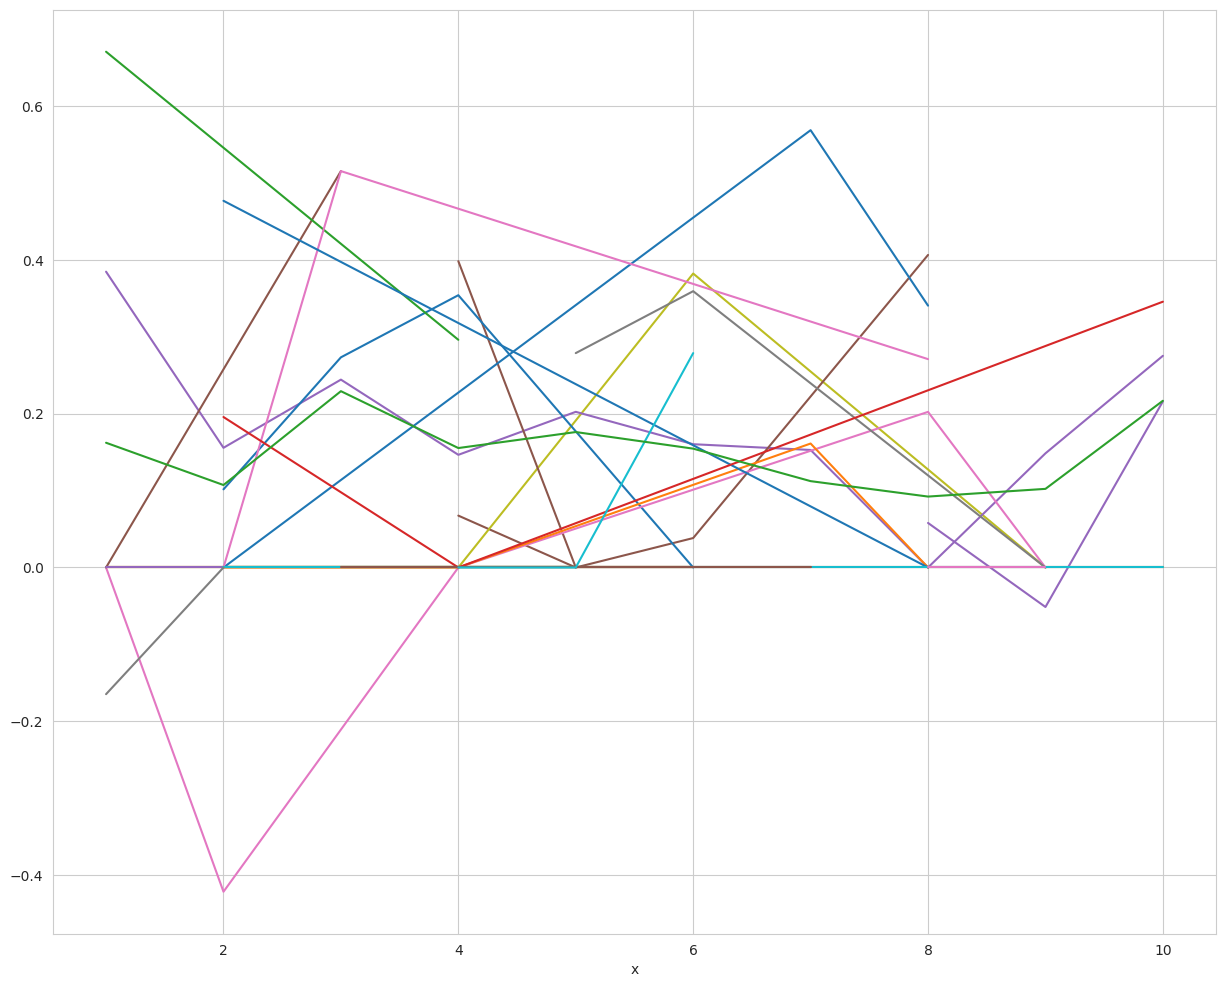

In [38]:
# Plotting polarity for each person (and combined) against time:

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(15,12))

for label, df in final.groupby('name'):
    df.plot(x='x', y='pol', ax=ax, label=label)

plt.legend().set_visible(False)

In [39]:
import itertools

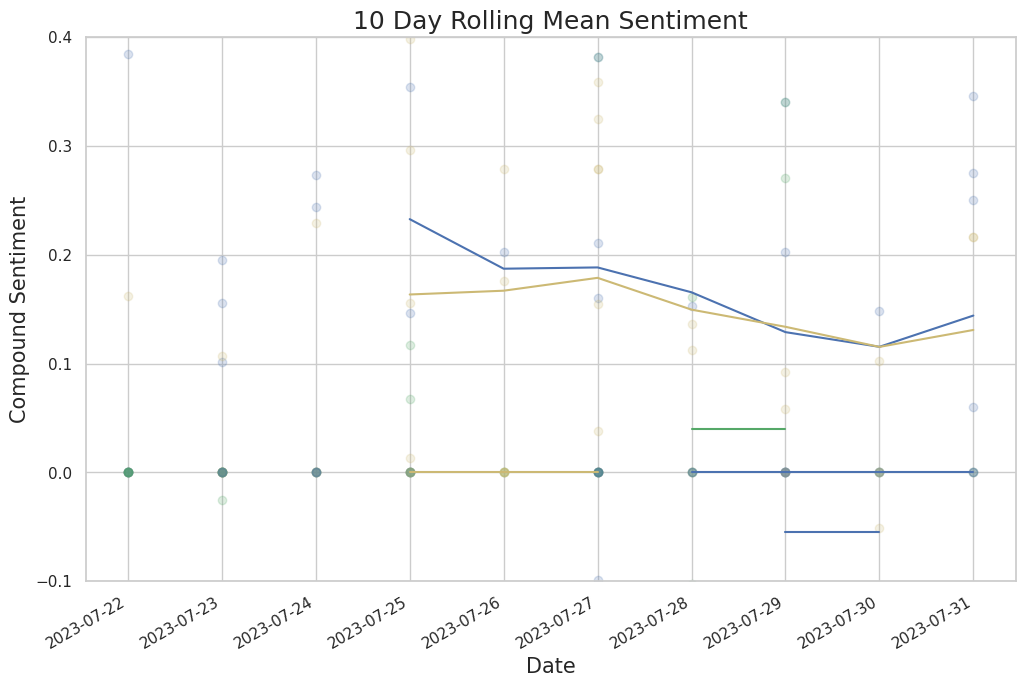

In [93]:
# Would work better for less number of people in chat

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
colours=['b','y','g']
colour_cycle = itertools.cycle(colours)

for label, df in final.groupby('name'):

    new=df.reset_index()
    new['rol'] = new['pol'].rolling(4).mean() # rolling mean calculation on a 10 day basis
    current_colour = next(colour_cycle)
    g = new.plot(x='date', y='rol', ax=ax, label=label, color=current_colour) # rolling mean plot
    plt.scatter(df['date'].tolist(), df['pol'], color=current_colour, alpha=0.2) # underlying scatter plot



ax.set_ybound(lower=-0.1, upper=0.4)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Compound Sentiment', fontsize=15)

g.set_title('10 Day Rolling Mean Sentiment', fontsize=18)
plt.legend().set_visible(False)


In [41]:
# Emojis, POS-tagging, Lexical Diversity and Classifying Dialogue:
ppl=defaultdict(list)

for line in content:

    try:
        # date = line.split('[')[1].split(',')[0]
        person = line.split(':')[1][7:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[3:]))

        ppl[person].extend(text)   # If key exists: extend (value) list, if not create a new key with text extended to list

    except:
        #print('Error!')
        #print(line)   # uncomment to examine failed line

        pass



In [42]:
def extract_emojis(strng):
  return ''.join(c for c in strng if c in emoji.EMOJI_DATA)

In [43]:
# Iterate through the two keys, extract all emojis from each persons list of words and count their most used:

for key, val in ppl.items():

    emojis=extract_emojis(str(ppl[key]))
    count = Counter(emojis).most_common()[:10]

    #print("{}'s emojis:\n {} \n".format(key, emojis))
    #print("Most common: {}\n\n".format(count))

In [44]:
# Categorise Messages With A Naive Bayes Classifier

nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.


True

In [45]:
posts = nltk.corpus.nps_chat.xml_posts()

In [46]:
# Extract features from each message, tokenize by word

def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

In [47]:
fposts = [(extract_features(p.text), p.get('class')) for p in posts]

In [48]:
# create a train and test set of the chat messages

test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]

In [49]:
# train the model
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [50]:
# Test the accuracy against the test set of data
print(nltk.classify.accuracy(classifier, test_set))

0.6685606060606061


In [51]:
# Some tests
classifier.classify(extract_features('Hi there!'))

'Greet'

In [52]:
classifier.classify(extract_features('Do you want to watch a film later?'))

'ynQuestion'

In [53]:
classifier.classify(extract_features('Yes, that sounds good'))

'Accept'

In [56]:
# Run on the whatsapp messages
ppl_cat = {}
#print("Types of messages sent by each member of the chat,"
#      " as classified by a Naive Bayes Classifier trained on the nltk nps_chat dataset \n***\n")

for key, val in ppl.items():
    cat = []
    for sent in val:
        cat.append(classifier.classify(extract_features(sent)))
    count = Counter(cat)
    ppl_cat[key] = count
    #print("{}: {} \n\n".format(key, count.most_common()))

In [57]:
# create a dataframe of this categorised data to plot
df = pd.DataFrame.from_dict(ppl_cat, orient='index')


In [58]:
# Since each person has sent a different number of messages, normalize these counts:
df = df.div(df.sum(axis=1), axis=0).round(3)
df

,Statement,nAnswer,Clarify,Emphasis,System,Reject,Other,ynQuestion,Accept,whQuestion,Emotion,yAnswer
+234 916 045 5006,0.400,0.200,0.200,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+234 807 555 0788,0.292,0.091,0.345,0.038,0.114,0.064,0.034,0.008,0.004,0.011,NaN,NaN
+27 68 193 2132,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+91 70473 56399,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+233 20 085 9305,0.667,NaN,0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
+27 67 258 5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN
+234 901 278 2843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN
+234 903 433 9193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN
+62 813-7704-5339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN


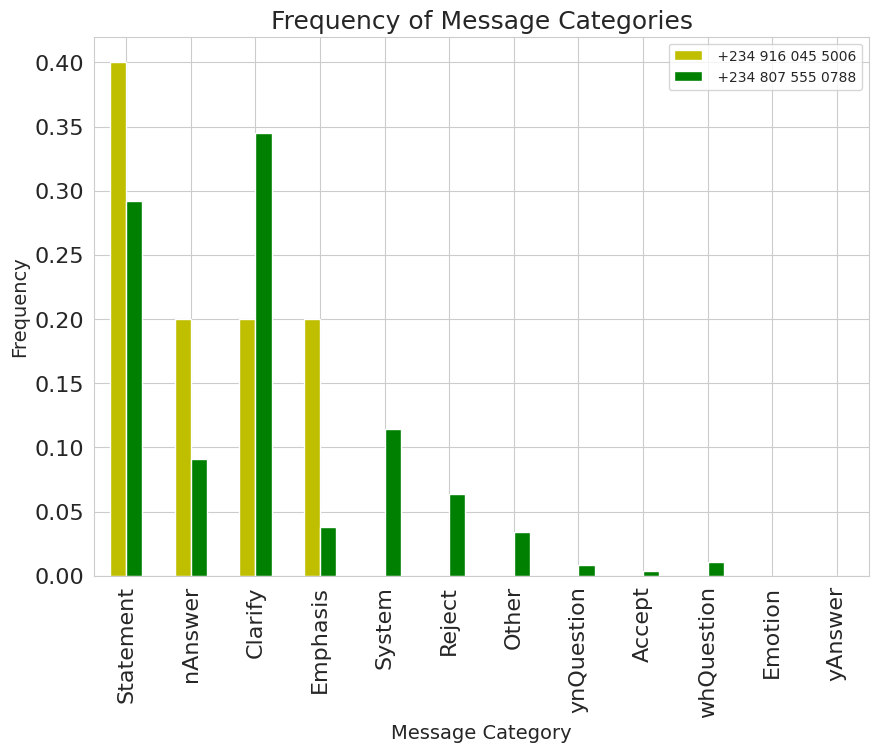

In [59]:
# Compare only 2 persons
ax = df[:2].T.plot(kind='bar', figsize=(10, 7), legend=True,
               fontsize=16, color=['y','g'])

ax.set_title("Frequency of Message Categories", fontsize= 18)
ax.set_xlabel("Message Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

plt.show()

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
# Wordcloud
# convert list to string and split individual words on a space -> list of individual words
# Create an empty word cloud dictionary to store word clouds for each person
word_clouds = {}

# Loop through each person in the 'ppl' dictionary
for person_name, text in ppl.items():
    # Convert the text to lowercase and split into individual words
    words = ' '.join(text).lower().split()

    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    words = [word for word in words if word not in stopwords_list]

    # Store the processed words in the word cloud dictionary
    word_clouds[person_name] = words

# Print word clouds for the first few people
#for person_name, word_cloud in word_clouds.items():
#    print(f"{person_name} Word Cloud:")
#    print(word_cloud[:5])  # Print the first 5 words for demonstration
#    print()

In [62]:
from wordcloud import WordCloud

No words left after removing stopwords for  Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
No words left after removing stopwords for  +263 71 718 7879
No words left after removing stopwords for  +265 991 86 00 64


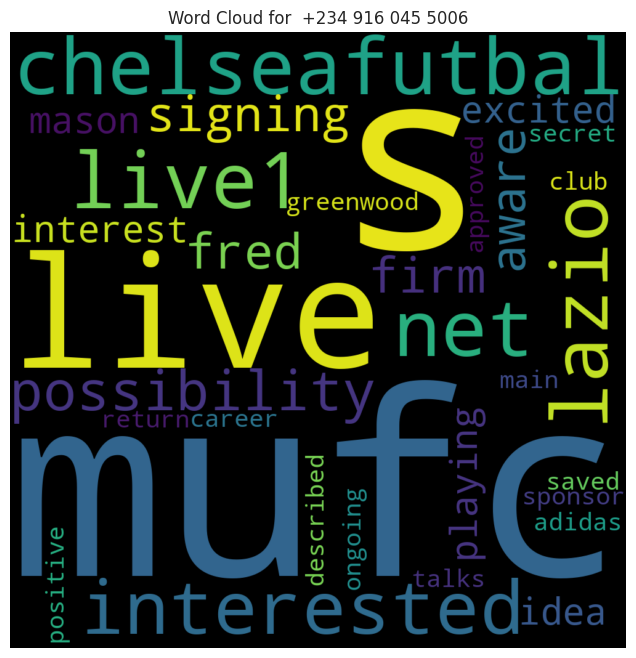

In [63]:
# To plot a person's wordcloud
# Function to generate and plot a word cloud for a given person
def plot_word_cloud(person_name, text):
    words = ' '.join(text).lower().split()
    stopwords_list = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stopwords_list]

    if not filtered_words:
        print(f"No words left after removing stopwords for {person_name}")
        return

    filtered_text = ' '.join(filtered_words)

    wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(filtered_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {person_name}")
    plt.show()

# Plot word clouds for the first few people in the 'ppl' dictionary
for person_name, text in list(ppl.items())[:4]:
    plot_word_cloud(person_name, text)

In [64]:
# Lexical Diversity i.e. how many different words a person uses/ how big a persons vocabulary is (or at least choose to use)

def lexical_diversity(text):
    return len(set(text)) / len(text) if len(text) != 0 else 0

In [65]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [66]:
for key, value in ppl.items():
    wrds=[]

    for line in ppl[key]:
        words = nltk.word_tokenize(line)
        wrds.extend(words)

    tagged = nltk.pos_tag(wrds, tagset='universal' )
    #print("{}'s lexical diversity: {} \n".format(key, lexical_diversity(tagged)))

In [67]:
# POS tagging
from nltk.stem.porter import *


In [68]:
stemmer = PorterStemmer()
wrds=[]
for line1 in ppl[' +91 70340 12240']:       # Put the name or number from the chat that you want

    words = nltk.word_tokenize(line1)
    wrds.extend(words)

In [69]:
tagged = nltk.tag.pos_tag(wrds, tagset='universal')
tggd = nltk.FreqDist(tag for (word, tag) in tagged)
tggd

FreqDist({'NOUN': 11, 'VERB': 6, 'ADP': 3, 'DET': 3, 'ADJ': 3, 'PRT': 2, 'CONJ': 1, 'PRON': 1, 'ADV': 1, 'NUM': 1, ...})

In [70]:
counts = Counter(stemmer.stem(word) for word, tag in tagged if tag == 'VERB' )
counts.most_common()[:10]

[('confirm', 1),
 ('suffer', 1),
 ('’', 1),
 ('expect', 1),
 ('be', 1),
 ('rule', 1)]

In [71]:
# "Non-Text Stuff" - Frequency of messages by time of day each month
dates=[]
for line in content:
    try:
        date = line.split(' - ')[0]
        date = re.sub(r'[^\d/: ,apm]', '', date)  # Remove unwanted characters
        if re.match(r'\d{2}/\d{2}/\d{4}', date):
            dates.append(date)
    except:
        print(line)  # examine the line that can't be read
        print('oops')
        pass


In [72]:
date=[]
time=[]
for item in dates:
    date.append(item.split(',')[0])
    time.append(item.split(',')[1])

In [73]:
dates[:3]

['22/07/2023, 8:40am', '22/07/2023, 10:06am', '22/07/2023, 10:12am']

In [74]:
df = pd.DataFrame(dates, columns=['dtm'])

# Corrected format string for time
df.dtm = pd.to_datetime(df.dtm, format='%d/%m/%Y, %I:%M%p')

print(df[:5])

                  dtm
0 2023-07-22 08:40:00
1 2023-07-22 10:06:00
2 2023-07-22 10:12:00
3 2023-07-22 10:18:00
4 2023-07-22 10:18:00


In [75]:
df['float_time'] = df.dtm.dt.hour + df.dtm.dt.minute / 60.0
df['year_month'] = df.dtm.dt.to_period('M')
df['day'] = df.dtm.dt.day_name()  # Use day_name() instead of weekday_name
df['day_num'] = df.dtm.dt.dayofweek

print(df[:5])


                  dtm  float_time year_month       day  day_num
0 2023-07-22 08:40:00    8.666667    2023-07  Saturday        5
1 2023-07-22 10:06:00   10.100000    2023-07  Saturday        5
2 2023-07-22 10:12:00   10.200000    2023-07  Saturday        5
3 2023-07-22 10:18:00   10.300000    2023-07  Saturday        5
4 2023-07-22 10:18:00   10.300000    2023-07  Saturday        5


In [76]:
df = df.sort_values('day_num')   # change this to 'year_month' if wanting to plot by this instead
df['freq'] = df.groupby('day')['day'].transform('count')
df[:4]

,dtm,float_time,year_month,day,day_num,freq
11560,2023-07-31 23:38:00,23.633333,2023-07,Monday,0,2246
2398,2023-07-24 09:34:00,9.566667,2023-07,Monday,0,2246
2397,2023-07-24 09:31:00,9.516667,2023-07,Monday,0,2246
2396,2023-07-24 09:05:00,9.083333,2023-07,Monday,0,2246


In [77]:
# First, need to create a colour pallete ordered by the total number of messages for each day
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)

In [78]:
# Ordered list of days according to total message count
days_freq = list(df.day.value_counts().index)
days_freq

['Sunday', 'Monday', 'Thursday', 'Saturday', 'Tuesday', 'Friday', 'Wednesday']

In [79]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [80]:
# This is essentially the current order of colours

lst = list(zip(days, pal[::-1]))
lst

[('Monday', [0.12071162840208301, 0.14526386650440642, 0.2463679091477368]),
 ('Tuesday', [0.18152581198633005, 0.24364059111738742, 0.37281834227732574]),
 ('Wednesday', [0.2426591079772084, 0.3511228226876375, 0.4852103253459974]),
 ('Thursday', [0.30463866738797124, 0.45571986933681846, 0.5751187147066701]),
 ('Friday', [0.3781016811140187, 0.5633546614344814, 0.6530658354036274]),
 ('Saturday', [0.46091631066717925, 0.662287611911293, 0.7165315069314769]),
 ('Sunday', [0.5632111255041908, 0.758620966612444, 0.7764634182455044])]

In [81]:
# Reorder colours according to their index position in the 'days_freq' list

pal_reorder=[]

for i in days:
    #print(i)
    j=0
    for day in days_freq:

        if i == day:
            #print(lst[j][1])
            pal_reorder.append(lst[j][1])
        j+=1


In [82]:
pal_reorder   # colours ordered according to total message count for the day

[[0.18152581198633005, 0.24364059111738742, 0.37281834227732574],
 [0.3781016811140187, 0.5633546614344814, 0.6530658354036274],
 [0.5632111255041908, 0.758620966612444, 0.7764634182455044],
 [0.2426591079772084, 0.3511228226876375, 0.4852103253459974],
 [0.46091631066717925, 0.662287611911293, 0.7165315069314769],
 [0.30463866738797124, 0.45571986933681846, 0.5751187147066701],
 [0.12071162840208301, 0.14526386650440642, 0.2463679091477368]]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shad

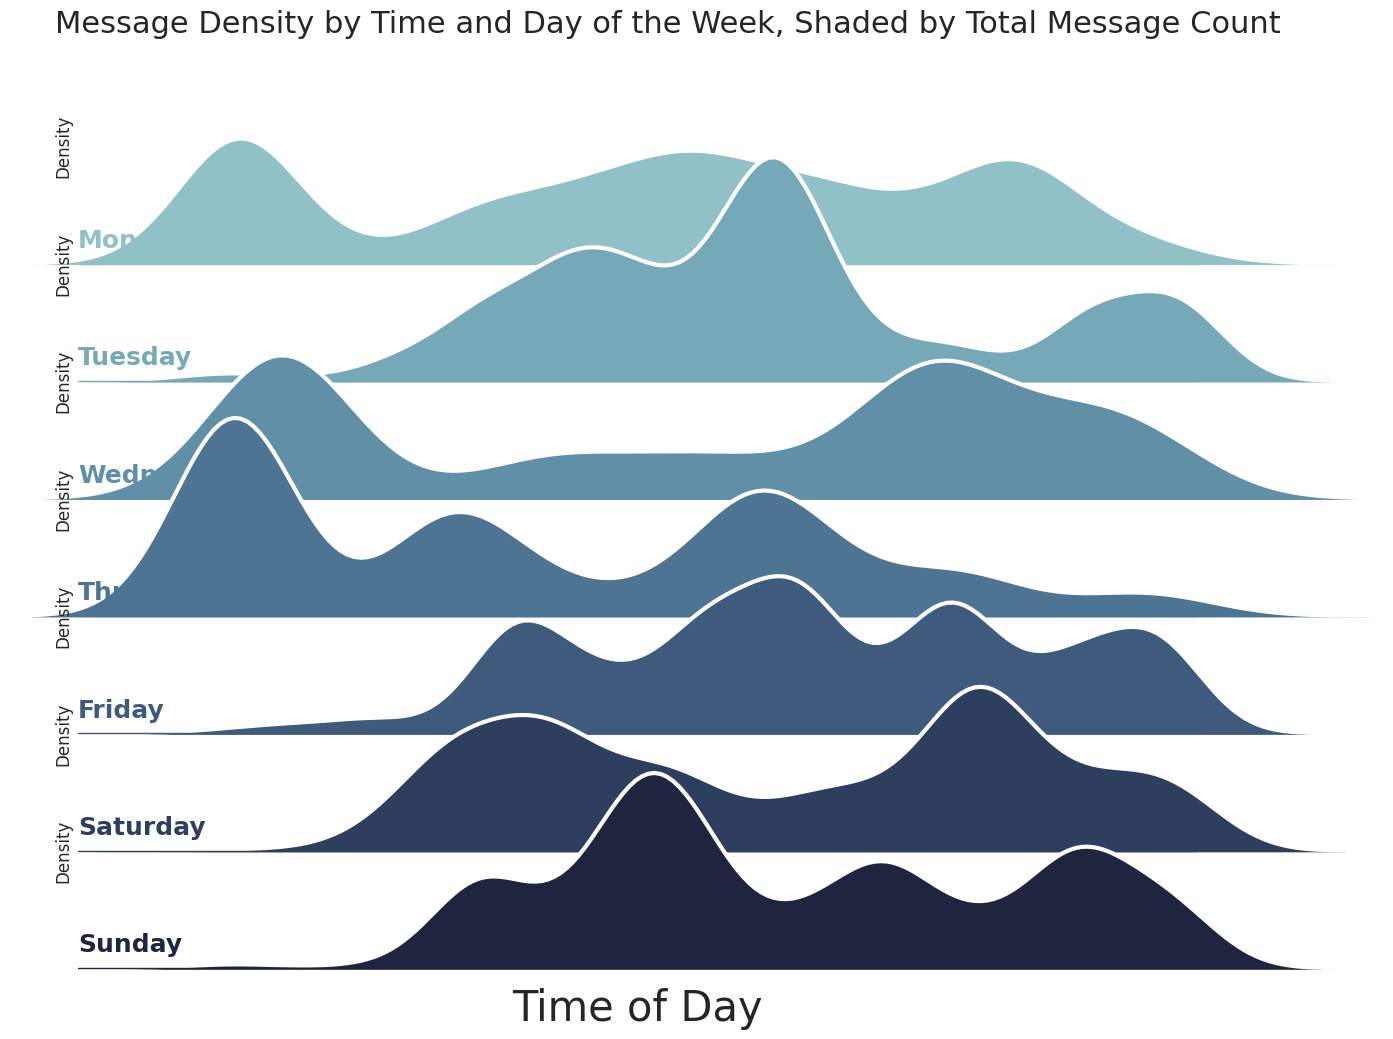

In [83]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)

g = sns.FacetGrid(df[(df.float_time > 8)], row="day", hue="day",
                  aspect=10, height=1.5, palette=pal, xlim=(7,24))

# Draw the densities in a few steps
g.map(sns.kdeplot, "float_time", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "float_time", clip_on=False, color="w", lw=3, bw=.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.1, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, size=18)

g.map(label, "float_time")
g.set_xlabels('Time of Day', fontsize=30)
g.set_xticklabels(fontsize=20)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)
g.fig.suptitle('Message Density by Time and Day of the Week, Shaded by Total Message Count', fontsize=22)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
